# CORRELATION CALCULATOR

## QUESTION

Banu is required to conduct a survey for the research methods course and analyze the survey results. She decides to investigate the relationship between daily sleep time and happiness as the homework subject. She wants to examine this relationship quickly using R.

1) Create a function called **cor_fu**.  This function takes two arguments:  **x** as the observed daily sleep time data and **y** as the observed happiness data. The function initially determines the correlation between **x** and **y**. 
  - If the absolute value of the correlation between **x** and **y** is larger than 0.4,  **cor_fu** will do regression analysis in which x is the independent variable. The function will return the plot of observed variables and the regression line.
  - If the absolute value of the correlation between **x** and **y** is smaller than 0.4, the function will return **"There is no significant correlation"**.

2) To see if the function works accurately, create sample data of daily sleep time and happiness level with 50 variables. Use RNGversion "3.3.1" and set seed to 732.
 - Create a vector named **hours** from a normal distribution with a mean equal to 7.5 and a standard deviation equal to 2.5.
 - Create a vector named **happ** from uniformly distributed numbers between 1 to 5.
 
 
Use these vectors in your function. Your function should return an output as follows:

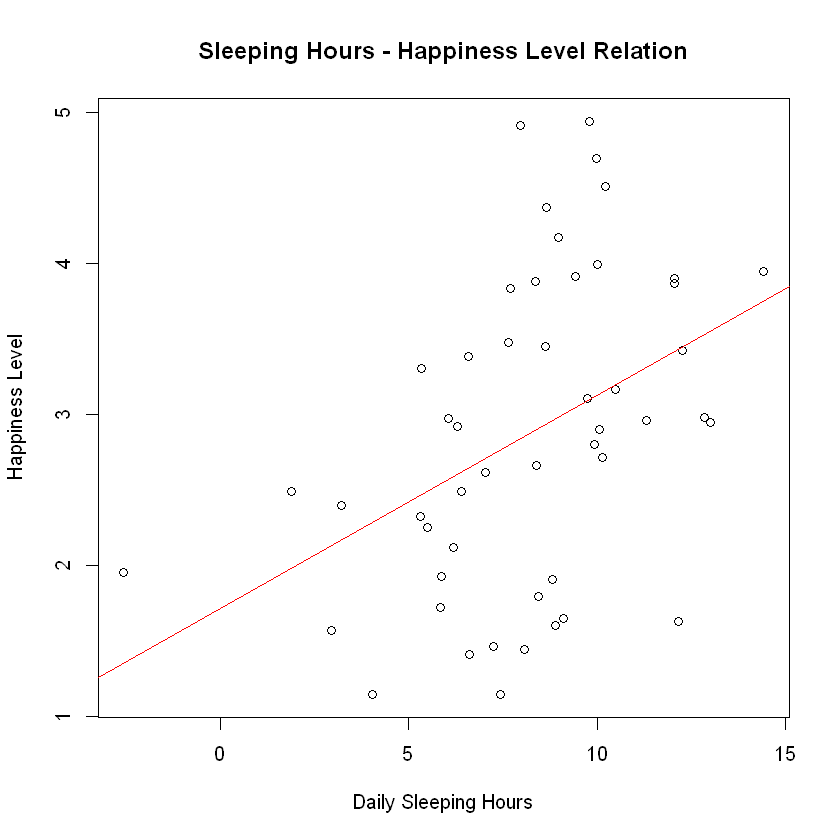

## SOLUTION

In [ ]:
#1
cor_fu <- function(x,y)
{
    cor_xy <- cor(x,y,method="pearson")
    if(cor_xy > 0.4 || cor_xy < -0.4 )
    {
        linreg <- lm(y~x)
        plot(x,y, main = "Sleeping Hours - Happiness Level Relation", xlab = "Daily Sleeping Hours", ylab = "Happiness Level")
        abline(linreg, col = "red")
    }
    else
    {
        return("There is no significant correlation")
    }
}

#2
RNGversion("3.3.1")
set.seed(732)
hours <- rnorm(50, 7.5, 2.5)
happ <- runif(50,1,5)
cor_fu(hours, happ)

# FRODO AND THE RING

## QUESTION

Frodo has a ring that extends his life expectancy. However, having the ring makes him more lonely which reduces his life expectancy at the same time. Frodo's lifespan is given by the following equation:

    y <- 0.4x^2 - 8x + 3 + rnorm(30, mean = 50, sd=2)

where y denotes his lifespan and x denotes the number of years he holds the ring. 

1) Plot the lifespan of Frodo according to the number of years he holds the ring. Assume that Frodo can hold the ring from 1 to 30 years. Name the x-axis as **"the ring"**, y-axis as **"Frodo's lifespan"** and title it **"Frodo and The Ring"**. You should get the following graph:

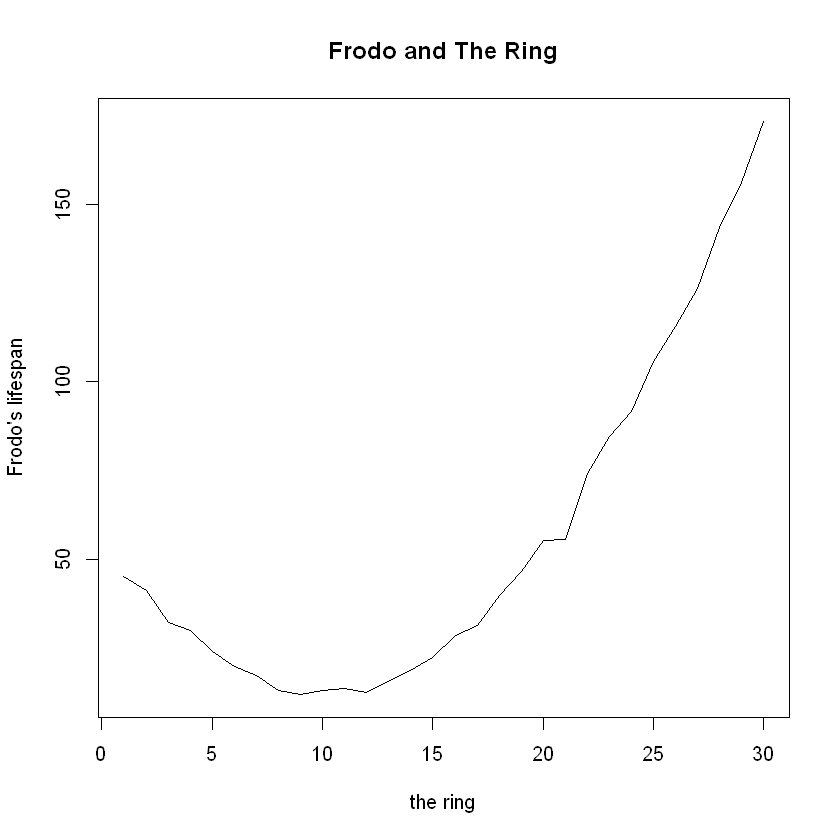

2) Frodo doesn't know this equation thoroughly. That's why he wants to get an estimate for his life expectancy. Set up a linear model for Frodo's life expectancy and get the estimated model. Name it **estimated_lifespan**. 

3) Using **estimated_lifespan**, create an approximation line for Frodo's lifespan so that he can decide on how many years to keep the ring. Plot this line on top of the actual graph and observe whether it is accurate or not. Your final graph should look like this:

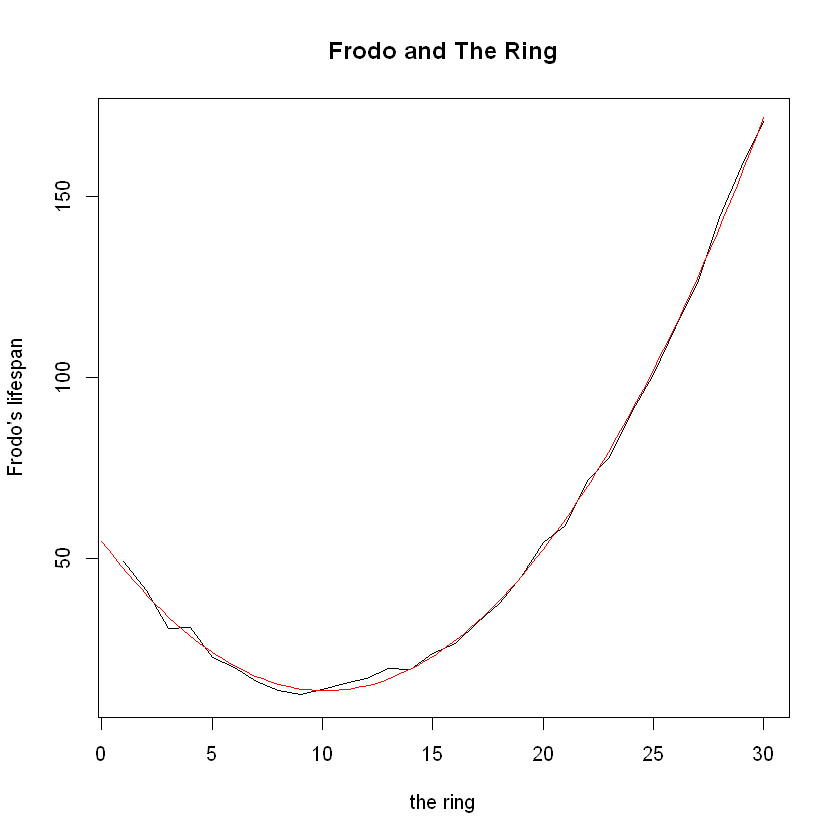

## SOLUTION

In [ ]:
#1
x <- 1:30
y <- 0.4*x^2 - 8*x + 3 + rnorm(30, mean = 50, sd=2)
plot(x,y, xlab = "the ring", ylab = "Frodo's lifespan", main = "Frodo and The Ring", "l")

#2
x1 <- x
x2 <- x^2
estimated_lifespan <- lm(y~x1+x2, data=data.frame(x1,x2,y))
estimated_lifespan

#3
a <- estimated_lifespan$coefficients["x1"]
b <- estimated_lifespan$coefficients["x2"]
c <- estimated_lifespan$coefficients["(Intercept)"]
xp <- seq(0,30,length.out = 100)
yp <- a*xp + b*xp^2 + c
lines(xp,yp, col="red")

# PREDICTING THE FINAL SCORE

## QUESTION

Feyza realized that there is a linear relationship between her hours of study, how interested she is in that subject, and her final score. So she recorded how many hours she studied and gave a score to each course indicating how interesting she finds them. Using the following table, she wants to predict her final score for microeconomics.

| Course         | Hours | Interest  | Final Score  |
|----------------|---|---|---|
| Film Analysis  | 2  | 9  | 78 |  
| Statistics     | 5  | 5  |  63 |  
| Turkish        | 3  |  2 |  29 | 
| Business Law   | 7  | 2  | 55.5  |  
| Microeconomics | 4  | 5  |   | 

1) Keeping microeconomics out, assign study hours to a variable named **hours**.

2) Keeping microeconomics out, assign interest scores to a variable named **interest**.

3) Keeping microeconomics out again, assign interest scores to a variable named **final_score**.

4) Use the built-in `lm()` function to create a linear model and assign it to an object named **my_model**.

5) Make a prediction for microeconomics final score using your model's _coefficients_ and assign it to a variable named **micro_final**. Remove the element name and round your prediction to 2 decimal places as such:

```r
> names(micro_final) <- c()

> round(micro_final, digits = 2)

58.68
```
*Hint: You can use the* `coef()` *function to get your model's coefficients.*

##  SOLUTION

In [ ]:
#1
hours <- c(2, 5, 3, 7)

#2
interest <- c(9, 5, 2, 2)

#3
final_scores <- c(78, 63, 29, 55.5)

#4
my_model <- lm(final_scores ~ interest + hours)

#5
micro_final <- 4 * coef(my_model)["hours"] + 5 * coef(my_model)["interest"] + coef(my_model)["(Intercept)"]

#5 alternative
# micro_final <- predict.lm(my_model, newdata = data.frame(interest = 5, hours = 4))
names(micro_final) <- c()
round(micro_final, digits = 2)

#  LINEAR REGRESSION 

##  QUESTION

1) Copy the lines below to create 3  vectors. Create a data frame using these vectors as columns.
 
 ```r
RNGversion("3.3.1")
set.seed(5)
a <- seq(0,30,length.out=100)
b <- -0.15*a^2 + 3*a + rnorm(100,mean=30,sd=5)
c <- b + rnorm(100)
```
 
2) Plot the data frame as such :
 
 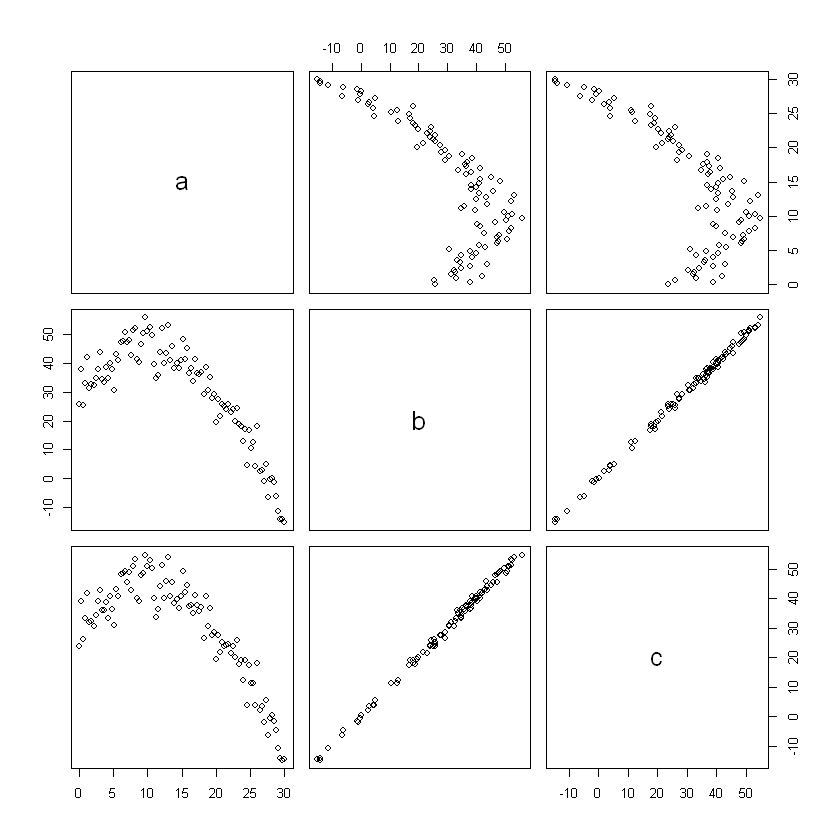
 
 
3) Now, create three plots which show relations between **a** & **b**, **a** & **c**, **b** & **c** respectively including the lines such that the distances between given points and the lines are minimized. As such:
 
 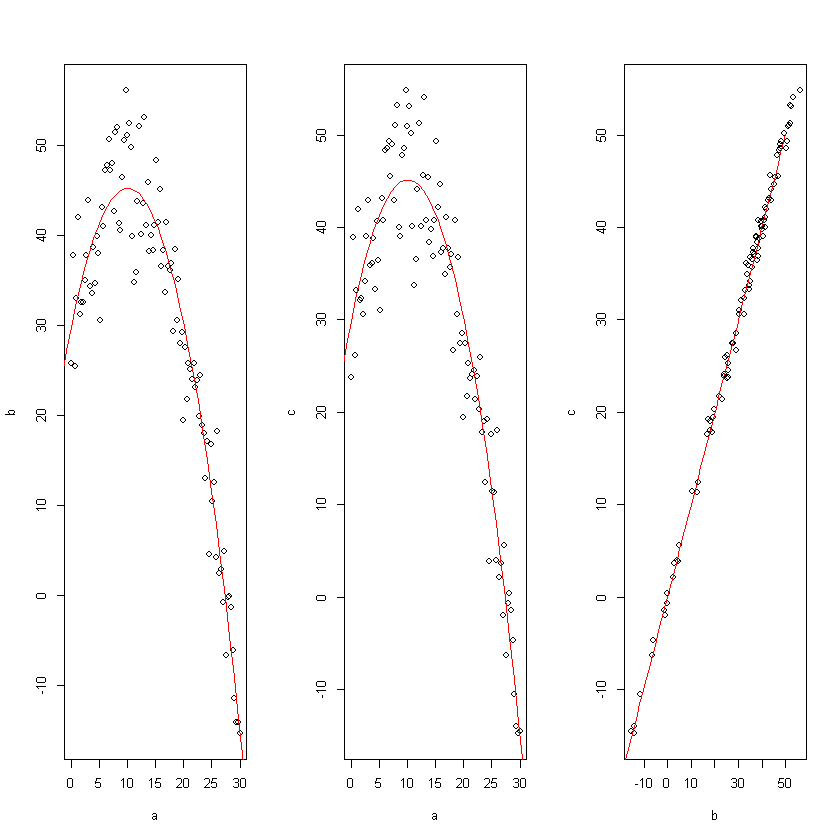

##  SOLUTION

In [ ]:
#1
RNGversion("3.3.1")
set.seed(5)
a <- seq(0, 30, length.out = 100)
b <- -0.15 * a^2 + 3 * a + rnorm(100, mean = 30, sd = 5)
c <- b + rnorm(100)
df <- data.frame(a, b, c)
df

#2
plot(df)

#3
par(mfrow = c(1, 3)) #We want to show 3 plots in the same figure. so we use par()
for(i in 1:2) #We will not show c in the x axis so i iterates form 1 to 2
  {
  for(j in 2:3) # We will not show a on y axis so j starts from 2, ends up at 3
    {
    if( i != j)
    {
      x <- df[,i]
      x2 <- df[,i]^2 
      y <- df[,j]
      r <- lm(y ~ x + x2, data = data.frame(x,x2,y)) #we need the coefficients of the line that we want to draw
      cofs <- c(r$coefficients) #creating a vector which holds the necessary coefficients
      ints <- seq(-30, 50, length.out = 100)
      lns <- cofs["x2"] * ints^2 + cofs["x"] * ints + cofs["(Intercept)"]
      plot(df[,i], df[,j], xlab = colnames(df)[i], ylab = colnames(df)[j]) #plotting the vectors
      lines(ints, lns, col = "red") #plotting the lines
    }
  }
}

# TIPS IN A RESTAURANT

## QUESTION

A waiter in a restaurant has been gathering data on the tips he received throughout his career. He wants to optimize his income by serving only customers with potentially high tip giving tendency. Help him analyze his tips data and find the optimal customer types.

1) Download **tips.csv** from the files section in Binder.

2) After importing the data set, assign dummy variables to columns **sex**, **smoker** and **time**.

3) Create a column for tip percentage by dividing the total bill by tip.

4) Find the correlation of tip percentage with **sex**, **smoker** and **size**. 

5) Draw a heat map using the **corrplot** package. 

Your heatmap should look like this:

```r
install.packages("corrplot")
library(corrplot)
corrplot(cormap,type = "upper",method="color")
```
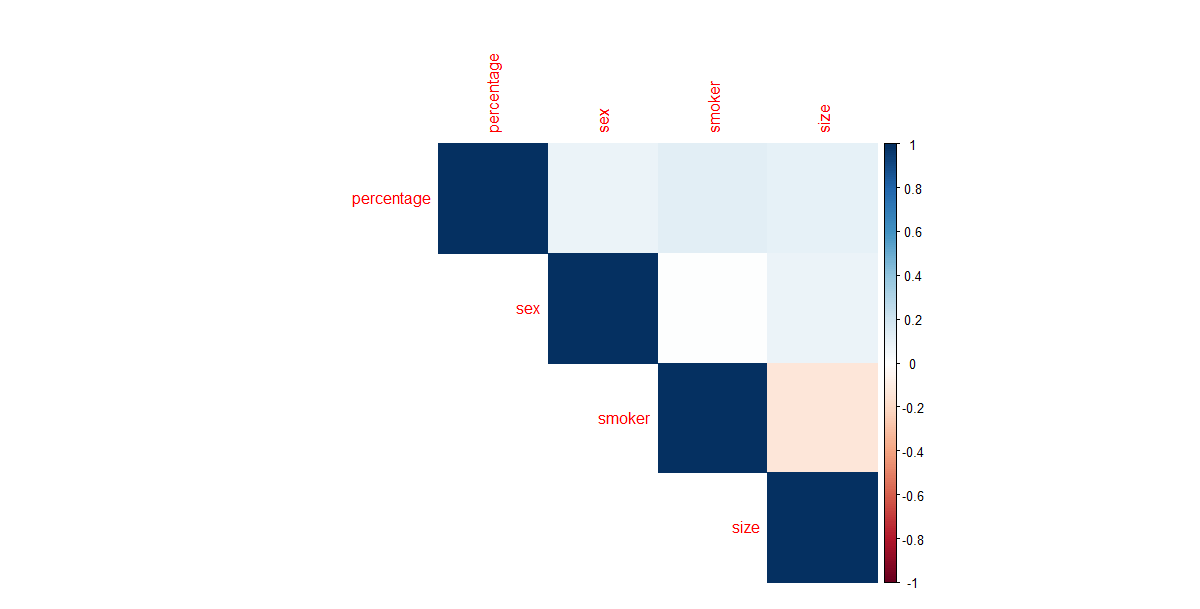

## SOLUTION

In [ ]:
#1
#load the data to Rstudio
tips <-read.csv("tips.csv")

#2
tips$sex <- ifelse(tips$sex =="Female",0,1)
tips$smoker <- ifelse(tips$smoker =="Yes",1,0)
tips$time <- ifelse(tips$time =="Dinner",1,0)

#3
tips$percentage <- tips$total_bill/tips$tip

#4
tipsneeded <- tips[c(8,3,4,7)]
cormap<- cor(tipsneeded)

#5
install.packages("corrplot")
library(corrplot)
corrplot::corrplot(cormap,type = "upper",method="color")

# TEMPERATURE AND BODY PRESSURE

## QUESTION

We want to analyze the correlation between temperature and pressure with the appropriate linear model.

For this, we will use the built-in dataset **pressure** with 2 columns and 19 rows. Each row is an observation that provides temperature and pressure readings as shown below:
```r

> head(pressure)
  temperature pressure
1           0   0.0002
2          20   0.0012
3          40   0.0060
4          60   0.0300
5          80   0.0900
6         100   0.2700
```


In order to observe which model is more appropriate, try fitting different models to the data: linear, quadratic, and cubic.
 
1) First, assign the columns temperature and pressure to x and y, respectively.


2) Then, fit a linear model to the data by assuming $y = ax+b$.
 
   Write a function called **linear** which returns a plot consisting of both the data and the linear model.
     The name of the x-axis should be "temperature" and the y-axis should be "pressure". Also title the graph **"Data and linear model"**, as such:
 ```r
> linear()
 ``` 
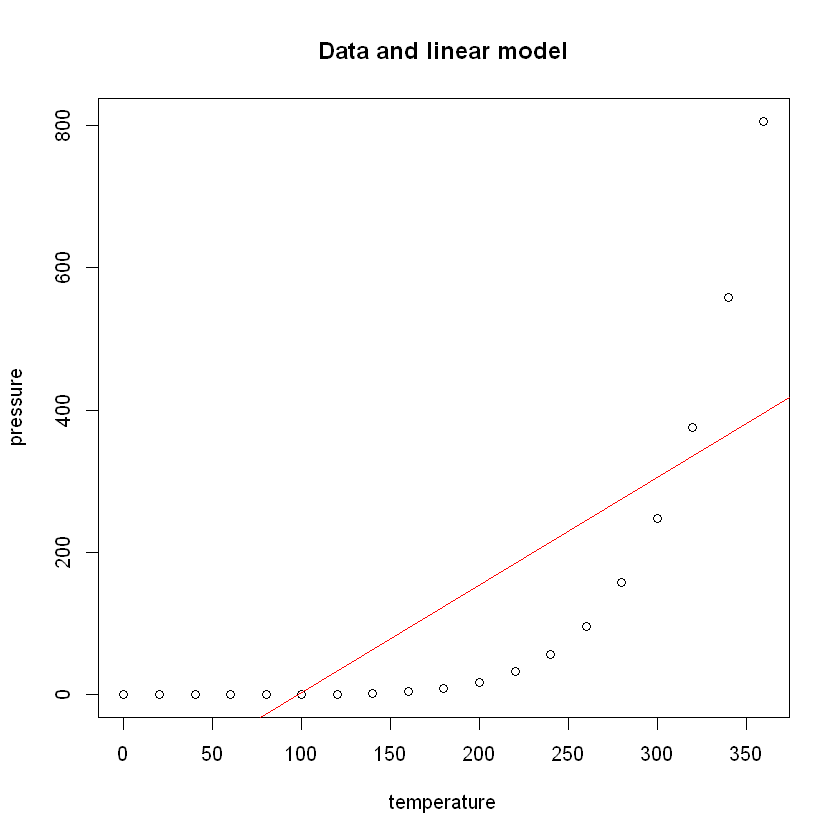

3) Now, fit a quadratic model by assuming $y=ax^2+bx+c$.
 
  Write a function called **quadratic** which returns a plot consisting of both the data and the quadratic model.
     The names of the axes are the same as before and the title is **"Data and quadratic model"**, as such:
 ```r
> quadratic()
 ```
 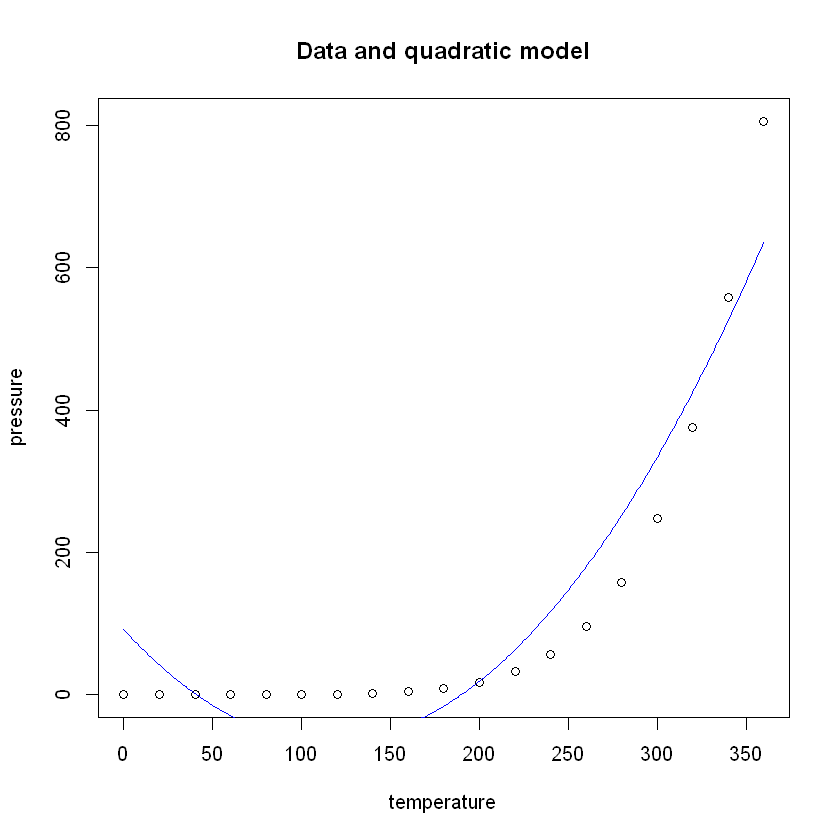
 
4) Finally, fit a cubic model by assuming $y=ax^3+bx^2+cx+d$.
 
  Write a function called **cubic** which returns a plot consisting of both the data and the cubic model.
     The names of the axes are the same as before and the title is **"Data and cubic model"**, as such:
 ```r
> cubic()
 ```
 
 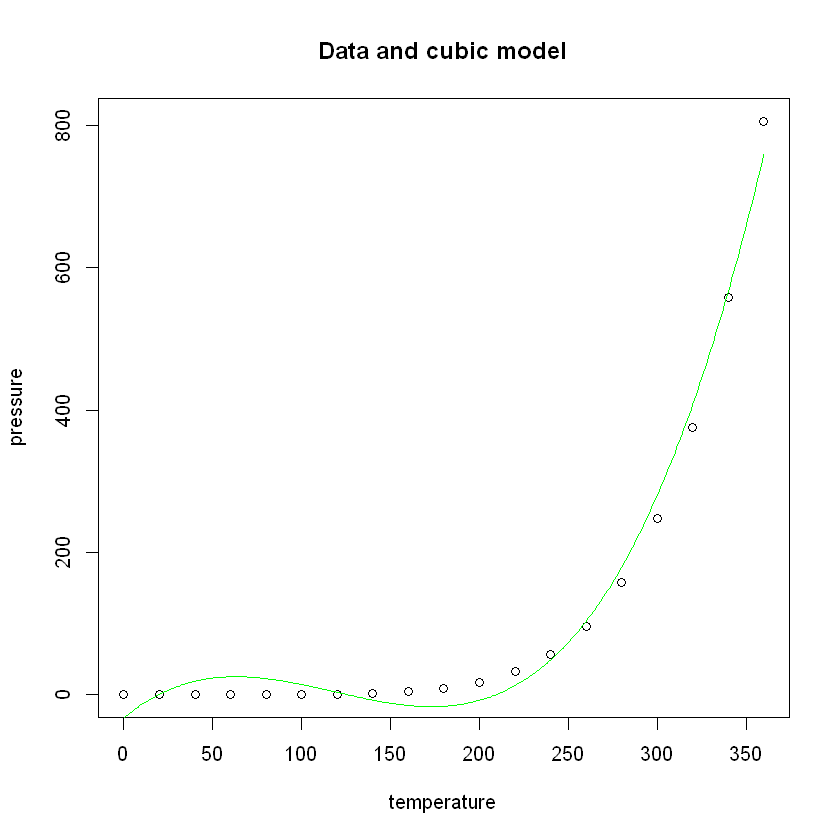

## SOLUTION

In [ ]:
head(pressure)

#1 Assigning the columns:
x <- pressure$temperature
y <- pressure$pressure

#2 for linear model:
linear <- function()
{
  linearmodel <- lm(y~x)
  plot(x,y,xlab = "temperature",ylab = "pressure",main="Data and linear model")
  abline(linearmodel,col="red")
}
linear()

#3for quadratic model:
quadratic <- function()
{
  #Creating new variables
  x1 <- x
  x2 <- x^2
  quadmodel <- lm(y~x1+x2)
    
  #Extracting coefficients
  a <- quadmodel$coefficients["(Intercept)"]
  b <- quadmodel$coefficients["x1"]
  c <- quadmodel$coefficients["x2"]
    
  # Setting up the prediction vector and plotting
  xp <- seq(0,360)
  yp <- b*xp+c*xp^2+a
  plot(x,y,xlab = "temperature",ylab = "pressure",main = "Data and quadratic model")
  lines(xp,yp,col="blue")
}
quadratic()

#4 for cubic model:
cubic <- function()
{
  #Creating new variables
  x1 <- x
  x2 <- x^2
  x3 <- x^3
  cubicmodel <- lm(y ~ x1+x2+x3)
  #Extracting coefficients
  a <- cubicmodel$coefficients["(Intercept)"]
  b <- cubicmodel$coefficients["x1"]
  c <- cubicmodel$coefficients["x2"]
  d <- cubicmodel$coefficients["x3"]
  # Setting up the prediction vector and plotting
  xp <- seq(0,360)
  yp <- b*xp + c*xp^2 + d*xp^3 + a
  plot(x,y,xlab = "temperature",ylab = "pressure",main = "Data and cubic model")
  lines(xp,yp, col= "green")
}
cubic()

# MTCARS

## QUESTION

For this question, we will use the built-in **mtcars** data set. **mtcars** data comes from the 1974 Motor Trend magazine. The data includes fuel consumption data, and ten aspects of car design for then-current car models, as such:

```r
> head(mtcars)
                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1
```
First, we will compose another data frame **mtcars_new** by filtering the original data **mtcars** to only include columns **mpg**, **disp**, **hp**, and **wt**, as such:
```r
> head(mtcars_new)
                   mpg disp  hp    wt
Mazda RX4         21.0  160 110 2.620
Mazda RX4 Wag     21.0  160 110 2.875
Datsun 710        22.8  108  93 2.320
Hornet 4 Drive    21.4  258 110 3.215
Hornet Sportabout 18.7  360 175 3.440
Valiant           18.1  225 105 3.460
```

Second, we will create a function called  **coefficient**. This function takes a data frame **df** as an argument and creates a regression model by taking the variable in the first column of **df** as the dependent variable (y) and the other three as the independent variables (x1, x2 and x3). 

Our **coefficient** function should return the scatter plot of **df** and coefficients of the model
(Names of the resulting vector should be in accordance with the column names of df).

Finally, we will try our function with **mtcars_new**. The result should be as such:

```r
> coefficient(mtcars_new)
  (Intercept)          disp            hp            wt 
37.1055052690 -0.0009370091 -0.0311565508 -3.8008905826 
```

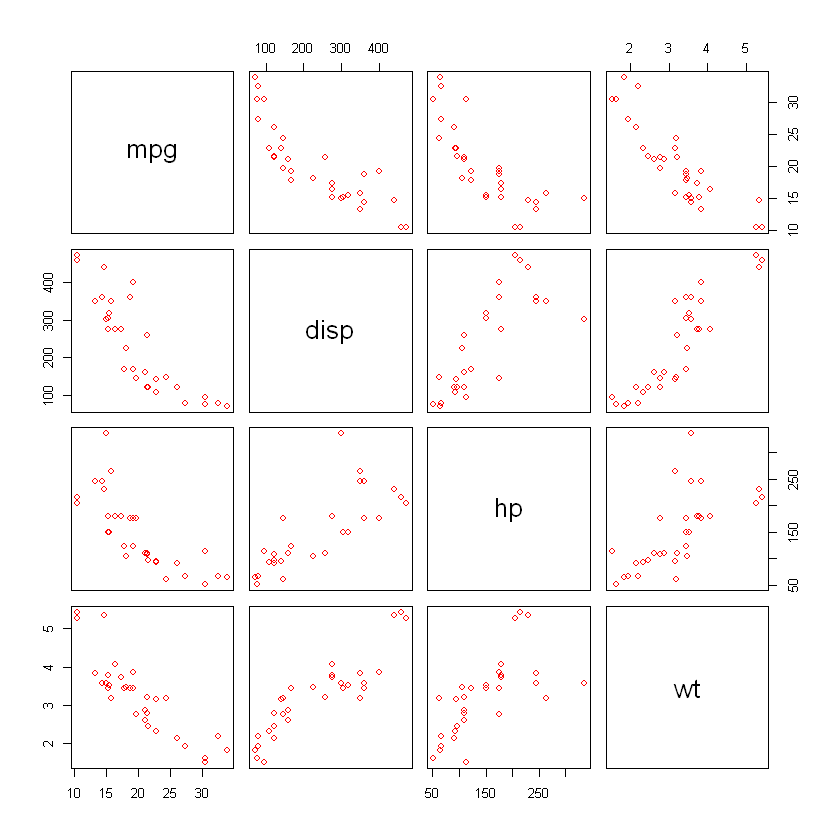

## SOLUTION

In [ ]:
#1 Filtering the original data
mtcars_new <- mtcars[, c("mpg","disp","hp","wt")]
head(mtcars_new)

#2
coefficient <- function(df)
{
  model <- lm(df[[1]] ~ df[[2]] + df[[3]] + df[[4]])#creating model
  plotted <- plot(df,col="red")
  coef <- coefficients(model)
  names(coef)[-1] <- colnames(df)[-1]#arranging the names
  return(c(coef, plotted))
}

#3
coefficient(mtcars_new)

# PRESSURE

## QUESTION

Use the built-in **pressure** dataset in R for this question.


A) First, plot the pressure data to see if it is linear. 

   1) In any case, draw the linear regression line which regresses pressure against temperature on top of your previous plot in red. 
    
   2) When this relationship is plotted, it will be evident that what the linear regression line predicts is not the same as the actual outcome. To show this, get the prediction for the pressure level at the temperature level *175* and mark this point with a *green* circle on your existing plot. 
    

This makes it clear that rather than a linear regression line, we need to get a polynomial regression line. 


B) In order to do so, 

   1) Reassign the pressure set to a new variable **polynomial** and create new columns within the polynomial data frame named **temp2**,**temp3**, **temp4** such that the 2nd, 3rd and 4th power (respectively) of the temperature value of each row will be stored. 
    
   2) With this new data frame, draw the polynomial regression line with *purple* onto your existing graph.
    
   3) To see now if the predictions of the polynomial regression line match with the actual outcome, get the predicted pressure value of the polynomial regression line for the temperature level *175* and mark that point on your existing graph as a *blue* triangle.
    
Your final plot should look like this:

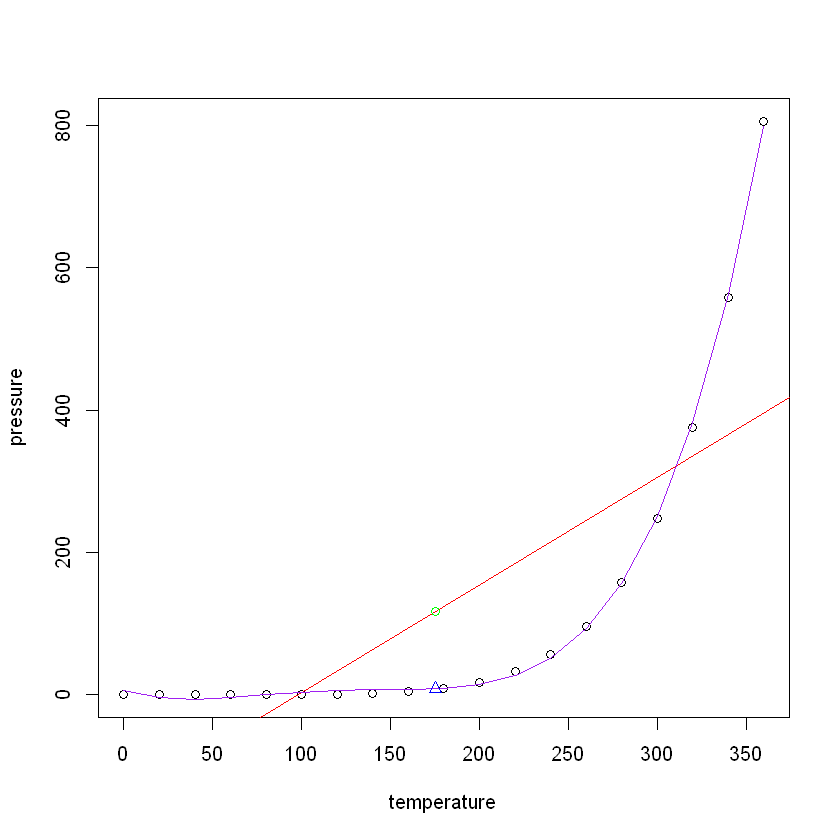

## SOLUTION

In [ ]:
#A
pressure
plot(pressure)

#1
lnm <- lm(pressure~temperature, data = pressure)
abline(lnm, col = "red")

#2
predicted <- predict(lnm, data.frame(temperature = 175))
points(175, predicted, col = "green")

#B
#1
polynomial <- pressure
polynomial$temp2 <- polynomial$temperature^2
polynomial$temp3 <- polynomial$temperature^3
polynomial$temp4 <- polynomial$temperature^4

#2
new_Reg <- lm(pressure ~ ., data = polynomial)
lines(polynomial$temperature, predict(new_Reg), col = "purple")

#3
prdf = data.frame(temperature  = 175, temp2 = 175^2, temp3 = 175^3, temp4 = 175^4)
predicted_pol <- predict(new_Reg, prdf) 
predicted_pol
points(175, predicted_pol, col = "blue", pch = 2)

#  NEW TOWN ROAD

##  QUESTION

Suppose you are the mayor of a small town and want to improve transportation for the town's people by building a road. As you have a very limited budget, you can only build a straight road but you want to minimize the total effort of the people. Apparently, effort of a family while reaching the road can be calculated as the square of the distance between their home and the road. Note that because of the landscape of the town; people can only go towards north or south, and can't go towards east or west of their houses before reaching the road.

X and Y coordinates of the houses are given as vectors:

```r
xc <- c(3.8, 7.5, 11.5, 15, 20, 23.7) 
yc <- c(2.3, 4.5, 6.1, 7.7, 9.5, 11.9)
```

1) Create a function called **build_road** that takes three arguments:

 - **house_x:** A vector containing the x coordinates of the houses
 - **house_y:** A vector containing the y coordinates of the houses
 - **m:** A vector containing the values that we choose in between (as the slope of the line that road will be on).
 
 
2) Inside this function:

  - For each value of **m**, calculate a value called **n** such that linear equation $y_{mean} = m*x_{mean} + n$ holds for the average values of **house_x** and **house_y** .
  - For each house, find the y coordinate of the road at the house's x coordinate using the **n** value you calculated. Assign these y coordinates to a vector called **road_y**.
  - Calculate the _total effort_ (sum of the squared distances between **house_y** and **road_y**).
  - Record the _total effort_ you calculated for each value of **m** and assign it to a new variable called **tot_effort**.
  - Find the **m** value that causes the least _total effort_. Assign this value to **slope**.
  - Calculate a value called **intercept** such that linear equation $y_{mean} = slope*x_{mean} + intercept$ holds for the average values of **house_x** and **house_y** .


3) Your function should return a vector containing the optimal coefficients for the mathematical expression of the road you will build as such:

```r
> set.seed(00111010)
> build_road(house_x = xc, house_y = yc, m = seq(from = 0, to = 20, length.out = 10000)) 

Slope
    0.458045804580458
Intercept
    0.778211154448778
```

Because of your success in building roads, you are appointed as the minister of transportation to build even more linear roads! But you quickly realized that choosing the right value for the **m** argument of **build_road** takes too much time when you need to build hundreds of roads. Using your calculus and linear algebra knowledge, you find that the optimal slope of the road can be calculated as:


<center>$Slope = Correlation_{XY} * {Standard Deviation}_{Y}/{Standard Deviation}_{X}$</center>


4) Create a function called **build_roads_faster** that takes 2 arguments: **house_x** and **house_y**. These arguments are vectors containing the X and Y coordinates of all the houses in an area.


5) Inside **build_roads_faster**, calculate the optimal slope of the road using the given formula and assign it to **slope**.


6) Inside **build_roads_faster**, calculate a value named **intercept** such that $y_{mean} = slope*x_{mean} + intercept$ holds for the average values of **house_x** and **house_y**.


7) Your function should return a vector containing the optimal coeffients for the mathematical expression of the road you will build as such:

```r
> set.seed(01000100)
> build_roads_faster(house_x = sample(-100:100, 70, T), house_y = sample(-100:100, 70, T))

Slope
    -0.166557748736457
Intercept
    2.55490349807118
```

##  SOLUTION

In [ ]:
xc <- c(3.8, 7.5, 11.5, 15, 20, 23.7) 
yc <- c(2.3, 4.5, 6.1, 7.7, 9.5, 11.9)

#1
build_road <- function(house_x = xc, house_y = yc, m)
{
  #2
  tot_effort <- c()
  for (m1 in m) #iterate over m values
  {
    n <- mean(house_y) - m1 * mean(house_x) #mean(house_y) = m1 * mean(house_x) + n 
    road_y <- m1 * house_x + n
    tot_effort <- c(tot_effort, sum((road_y - house_y) ^ 2))
  }
  slope <- m[order(tot_effort, decreasing = F)[1]] #element of m that gives the smallest tot_effort
  intercept <- mean(house_y) - slope * mean(house_x)
  #3
  return(c(Slope = slope, Intercept = intercept))
}

set.seed(00111010)
build_road(house_x = xc, house_y = yc,
           m = seq(from = 0, to = 20, length.out = 10000)) #chooses the best m value between 10000 numbers 
                                                           #there might be a better value outside this 10000
#4
build_roads_faster <- function(house_x, house_y)
{
  #5
  slope <- cor(house_x, house_y) * sqrt(var(house_y)) / sqrt(var(house_x)) #best value of m (or slope)
  #6
  intercept <- mean(house_y) - slope * mean(house_x) 
  #7
  return(c(Slope = slope, Intercept = intercept))
}

set.seed(01000100)
build_roads_faster(house_x = sample(-100:100, 70, T), house_y = sample(-100:100, 70, T))

# CHICKS

## QUESTION

**ChickWeight** is a built-in data set in R. It gives the weights of chicks that are on different diets. 

1) First, examine the data set with the function ``head(ChickWeight)``. Notice that the **weight** column gives the weights of the chicks, the **Diet** column indicates which diet they received, and the **Time** column gives the number of days since the birth of the chicks when the measurement was made.
```r
> head(ChickWeight)
  weight Time Chick Diet
1     42    0     1    1
2     51    2     1    1
3     59    4     1    1
4     64    6     1    1
5     76    8     1    1
6     93   10     1    1
```

2) Find out if there is any correlation between the number of days since birth and chicks' weights by applying the correlation test.

*Hint: You can apply a correlation test by using the ``cor.test()`` function. If the reported p-value is smaller than 0.05, it means the correlation is significant. If not, the correlation is insignificant.*

3) Upon seeing that **Time** and **weight** are correlated, you want to write a function to see their correlation on the plot and find out a linear formula for the relationship between them. Write a function named **plot_model** that takes a single argument **df** as a data frame with a default value of **ChickWeight**. It should return the plot of **weight** on the y-axis and **Time** on the x-axis with a best fit red line drawn on top of them. You can assume that we always want to plot every data frame's first column on the y axis and the second column on the x-axis with this function. The axis names should be the names of the columns of the data frame and the title of the plot should be  **"y-axis name vs. x-axis name"**. 

Your function should return the following plot:
```r
> plot_model()
```
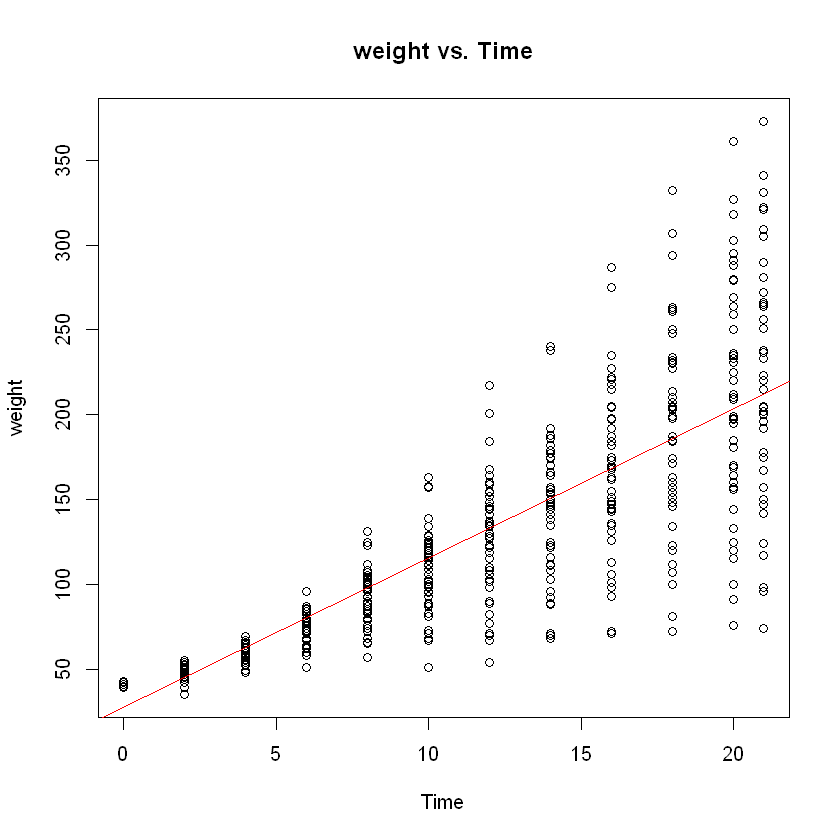

4) You also want to find out if **weight** and **Diet** are correlated. Apply the correlation test for **weight** and **diet**. 

*Hint: **Diet** is defined as a factor, so you need to convert it to a numeric vector before applying the test.*

5) Building a boxplot might also be useful in observing the relationship between two variables. Plot a boxplot for the values of **weight**, classified with respect to **Diet** types.

* Plot will be named as **Weight vs. Diet Type**, the x-axis will be named as **Diet Type**, and y-axis will be named as **Weight**. The first box will be named as **Type 1 Diet**, the second as **Type 2 Diet**, the third as **Type 3 Diet**, and the fourth as **Type 4 Diet**.


* The first box should be colored with purple, the second with green, the third with pink, and the fourth one with orange.


Your box plot should look like this:

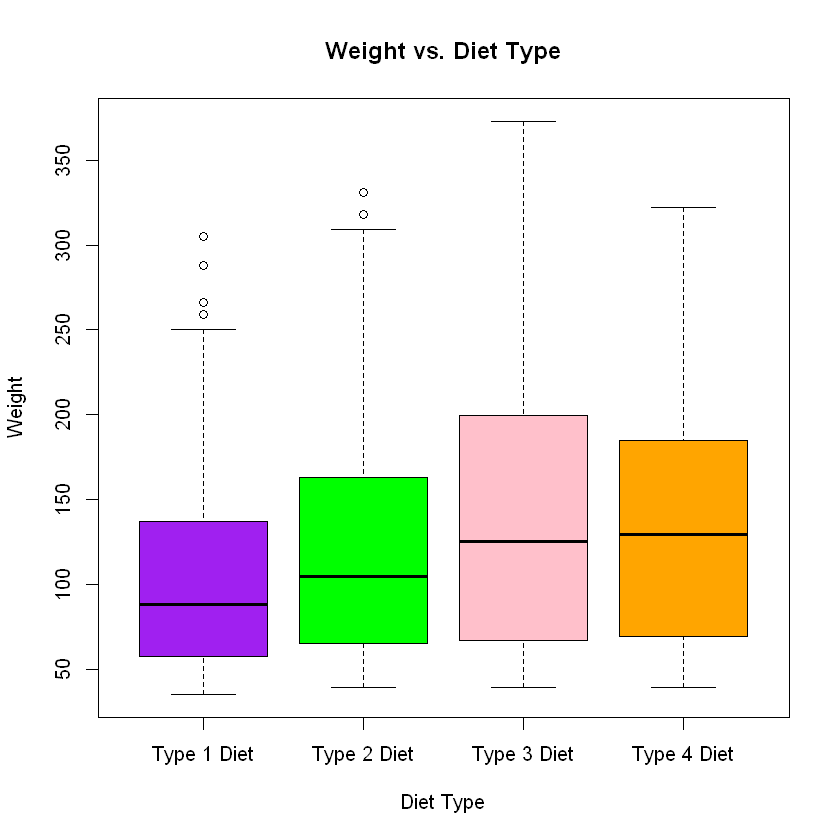

## SOLUTION

In [ ]:
#1
head(ChickWeight)

#2
cor.test(ChickWeight$Time, ChickWeight$weight)

#3
plot_model <- function(df = ChickWeight)
{
  plot(df[[2]], df[[1]], xlab = names(df[2]), ylab = names(df[1]),
       title(paste(names(df[1]), "vs.", names(df[2]), sep = " "  ) ) )
  linmodel <- lm(df[[1]]~df[[2]], df)
  abline(linmodel, col="red") 
}
plot_model()

#4
cor.test(ChickWeight$weight, as.numeric(ChickWeight$Diet))

#5
x1 <- ChickWeight$weight[ChickWeight$Diet==1]
x2 <- ChickWeight$weight[ChickWeight$Diet==2]
x3 <- ChickWeight$weight[ChickWeight$Diet==3]
x4 <- ChickWeight$weight[ChickWeight$Diet==4]
boxplot(x1, x2, x3, x4, col=c("purple", "green", "pink", "orange"),
        names=c("Type 1 Diet", "Type 2 Diet", "Type 3 Diet", "Type 4 Diet"),
        xlab="Diet Type", ylab="Weight", main=("Weight vs. Diet Type")
        )